# FOM Convergence Analysis

## Introduction

This package was created to analyze Serpent output files for Figure of Merit (FOM) convergence. It requires multiple Serpent output files over the course of a single run. To do this, the Serpent source code must be changed to output unique file names. The behavior is then controlled using the `outp` parameter in the input file (see [wiki](http://serpent.vtt.fi/mediawiki/index.php/Input_syntax_manual#set_outp )), to determine the number of cycles after which the new file is written.

Then, place all the files from a run in a single directory.

Full documentation is provided in the [doc](./docs/_build/html/index.html) folder.

### Table of Contents

1. [Initialize](#1.-Initialize)

2. [Single Data Set](#2.-Single-Data-Set)

    1. [Getting Data](#Getting-Data)
    
    2. [Automatic Plotting](#Automatic-Plotting)
    
    3. [Collapsing Groups](#Collapsing-Groups)
    
    4. [Matrix Entries](#Matrix-Entries)
    
3. [Multiple Data Sets](#3.-Multiple-Data-Sets)

-------

# 1. Initialize

The analysis tools are in two modules:

-`core`: containing the `DataFile` object 

-`fom`: containing tools for analyzing FOM convergence

A warning is expected from `pyne`, which is used to upload the Serpent files into python.

In [1]:
import analysis.core as core
import analysis.fom as fom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


These are just for plot formatting:

In [2]:
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# 2. Single Data Set

A single data set can be uploaded using the `fom.Analyzer` object. This object requires a folder location, and an optional name to identify the data set. For this notebook, I am using the WDT_Data repository, the base directory is set to its location. You can download that repo and set this base_dir to follow along.

In [3]:
base_dir = '~/downloads/wdt_data/'

This will upload all the files for the PWR pin cell for a single run.

In [4]:
loc = base_dir + 'pwr/S0100/W0100/'
pwr_analyzer = fom.Analyzer(loc)

Uploaded 1450 files.


## Getting Data

The data can be directly accessed by using the Serpent output labels in the `res.m` files and the group number of interest. It will be returned in an array with the corresponding cycle number. By default, the FOM for the value will be returned. 

For example, the FOM for Infinite Flux `INF_FLX` for group 1:

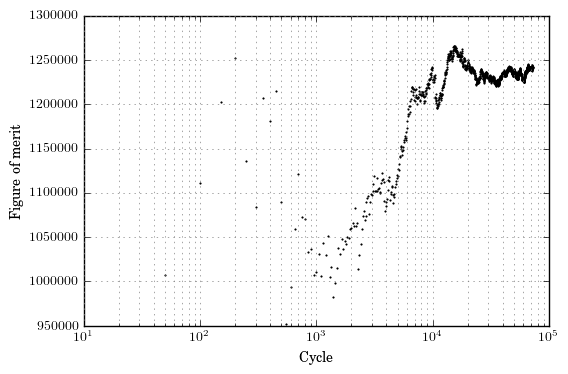

In [5]:
# Get data
inf_flx = pwr_analyzer.get_data('INF_FLX', grp_entry = 1)

# Plotting
plt.semilogx(inf_flx[:,0], inf_flx[:,1],'.k',ms=2)
plt.xlabel('Cycle')
plt.ylabel('Figure of merit')
plt.grid(True,which='both',color='0.5')
plt.show()

The `fom` parameter can be set to `False` to display the variance instead of the calculated FOM:

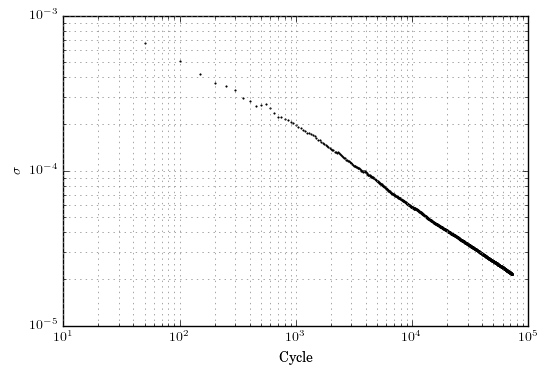

In [6]:
# Get data
inf_flx = pwr_analyzer.get_data('INF_FLX', grp_entry = 1, fom = False)

# Plotting
#lt.figure(figsize=(12, 9))
plt.loglog(inf_flx[:,0], inf_flx[:,1],'.k',ms=2)
plt.xlabel('Cycle')
plt.ylabel('$\sigma$')
plt.grid(True,which='both',color='0.5')
plt.show()

Multiple group values can also be returned by providing a list of groups to the same function. Groups 1 and 2 are plotted below:

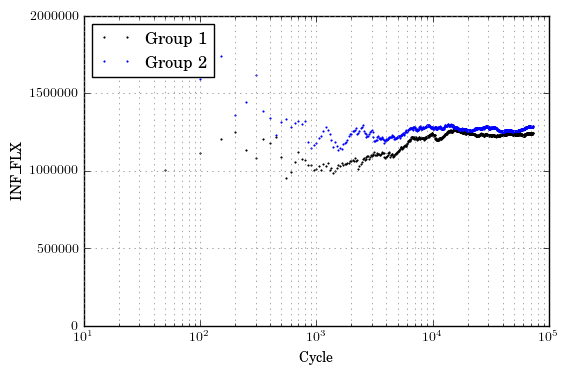

In [7]:
# Get data
grps = [1,2] #Multiple groups given in a list
inf_flx = pwr_analyzer.get_data('INF_FLX', grp_entry = grps)

# Plotting
plt.semilogx(inf_flx[:,0], inf_flx[:,1],'.k',ms=2)
plt.semilogx(inf_flx[:,0], inf_flx[:,2],'.b',ms=2)
plt.ylim([0,2e6])
plt.xlabel('Cycle')
plt.ylabel('INF\_FLX')
plt.grid(True,which='both',color='0.5')
plt.legend(['Group 1','Group 2'], loc = 'best')
plt.show()

We can calculate an average value for FOM or error usign the `get_avg` function. We need to choose the number of points to use. Here we get the average for the last 10 points and then plot it as a horizontal line.

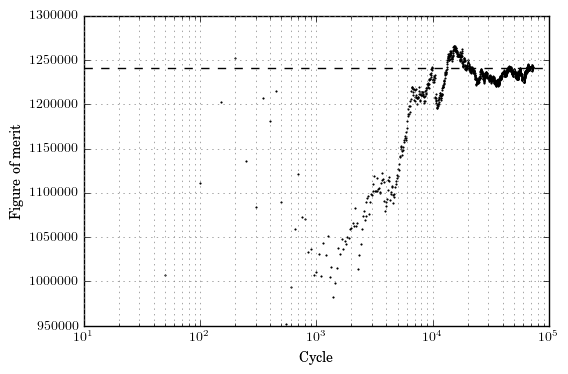

In [6]:
# Get data
inf_flx = pwr_analyzer.get_data('INF_FLX', grp_entry = 1)
inf_flx_avg = pwr_analyzer.get_avg('INF_FLX',grp_entry = 1, n = 10)

# Plotting
plt.semilogx(inf_flx[:,0], inf_flx[:,1],'.k',ms=2)
plt.xlabel('Cycle')
plt.ylabel('Figure of merit')
plt.grid(True,which='both',color='0.5')
plt.axhline(y=inf_flx_avg, color='k', ls='--')
plt.show()

## Matrix Entries

The `get_data` and `get_avg` methods supports single groups, multiple groups, or matrix entries for matrix quantities. For example, we can plot the (1,1) entry for the infinite zeroth moment of scattering:

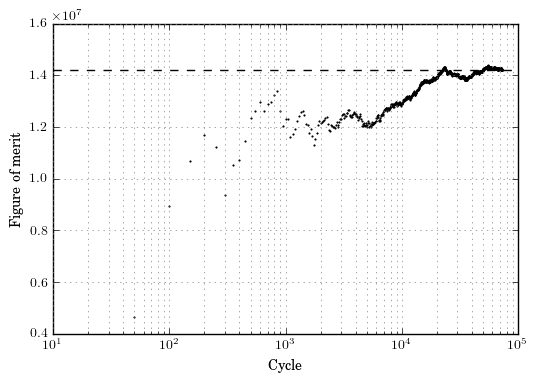

In [8]:
# Get data
inf_flx = pwr_analyzer.get_data('INF_SP0', grp_entry = (1,1))
inf_flx_avg = pwr_analyzer.get_avg('INF_SP0', grp_entry = (1,1), n = 10)

# Plotting
plt.semilogx(inf_flx[:,0], inf_flx[:,1],'.k',ms=2)
plt.xlabel('Cycle')
plt.ylabel('Figure of merit')
plt.grid(True,which='both',color='0.5')
plt.axhline(y=inf_flx_avg, color='k', ls='--')
plt.show()

## Automatic Plotting

The `get_data` function can also automatically plot using `plot = True`

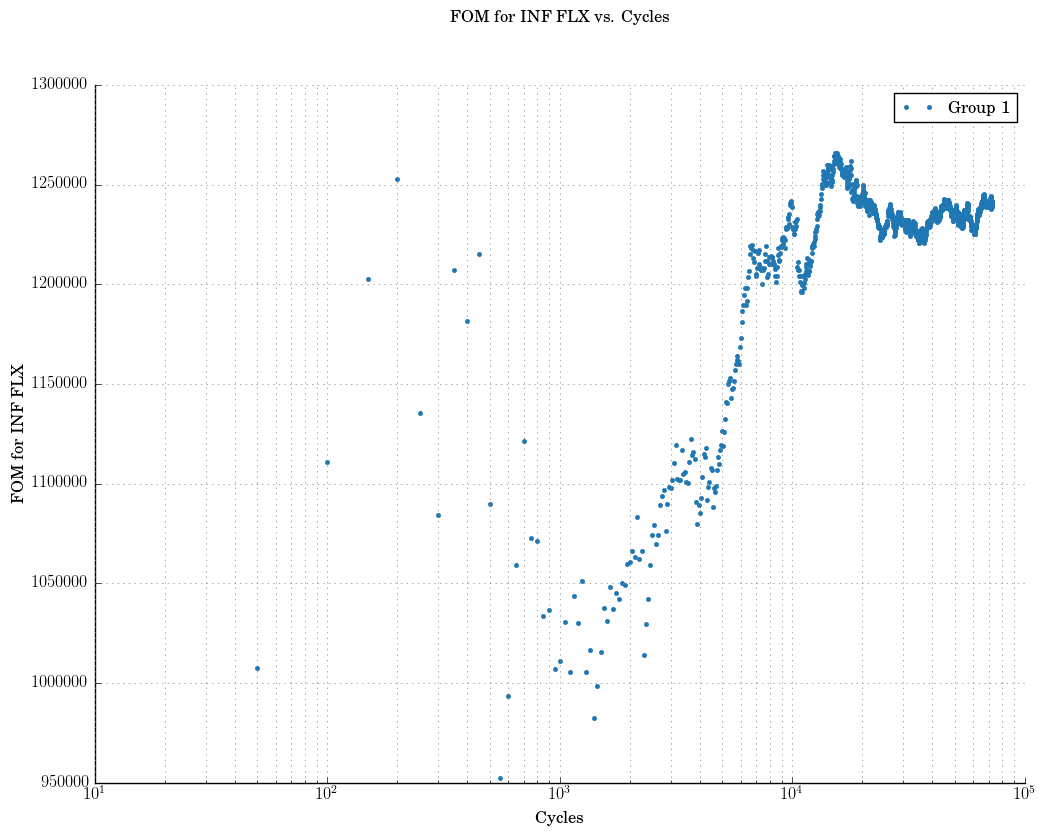

In [8]:
# Get data
inf_flx = pwr_analyzer.get_data('INF_FLX', grp_entry = 1, plot = True)

Some formatting is done automatically. FOM is shown on a semi-log plot and error is shown in a log-log plot.

The function still returns the data to be plotted.

## Collapsing Groups

A combined FOM for more than one group can be accessed using `get_collapse` in place of `get_data` and `get_collapse_avg` in place of `get_avg`. Here we plot the combined FOM for groups 1 and 2 and the average value based on 10 points.

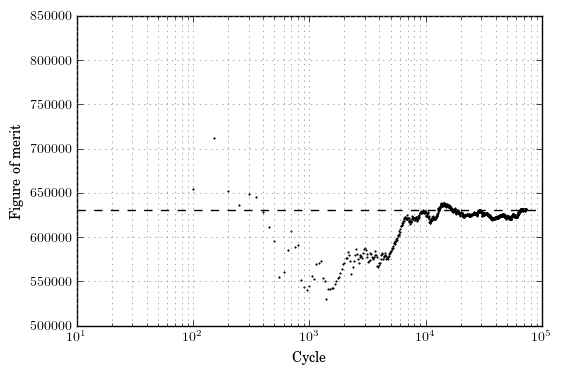

In [15]:
# Get data
inf_flx = pwr_analyzer.get_collapse('INF_FLX', grps = [1,2])
inf_flx_avg = pwr_analyzer.get_collapse_avg('INF_FLX',
                                            grps = [1,2], n = 10)

# Plotting
plt.semilogx(inf_flx[:,0], inf_flx[:,1],'.k',ms=2)
plt.xlabel('Cycle')
plt.ylabel('Figure of merit')
plt.grid(True,which='both',color='0.5')
plt.axhline(y=inf_flx_avg, color='k', ls='--')
plt.show()

# 3. Multiple Data Sets

Multiple data sets are best handled using the `Comparator` class. This class is designed to created multiple `Analyzer` objects and then quickly compare the results of the data sets.

In this example, we will compare three of the WDT data sets. Although the names were optional for the `Analyzer`, they are required when initializing the `Comparator`

In [9]:
dirs = [base_dir + 'pwr/S0100/' + str(d) for d in 
        ['W0100/', 'W0200/', 'W0300']]
names = ['0.1', '0.2', '0.3']
pwr_comp = fom.Comparator(dirs, names)

Uploaded 1450 files.
Uploaded 630 files.
Uploaded 630 files.


The main function of the `Comparator` class is to compare the data sets that have been uploaded into it. The method `Comparator.ratio` will return first the names of the data sets, then a ratio of the average FOM.

**Note:** the _first_ data set uploaded into the Comparator is used as the "base case" for calculating ratios.

Ex.
For the three data sets in `pwr_comp`, we are interested in comparing the infinite flux `INF_FLX` for group 1, using the final 10 points to calculate the average.

In [10]:
names, ratio = pwr_comp.ratio('INF_FLX', 2, n_pts=10)
df = pd.DataFrame({'Names' : names, 'Ratio': ratio})
df

,Names,Ratio
0,0.1,1.000000
1,0.2,1.015946
2,0.3,1.039355


We can also get the ratio for combined groups, as in the `Analyzer` class. Here, we collapse groups 1

In [14]:
names, ratio = pwr_comp.collapse_ratio('INF_FLX', [1,2], n_pts=10)
df = pd.DataFrame({'Names' : names, 'Ratio': ratio})
df

,Names,Ratio
0,0.1,1.000000
1,0.2,1.015109
2,0.3,1.029413


The `Comparator` can also plot automatically. The `grp_entry` field supports a single group, multiple groups, or matrix entries.

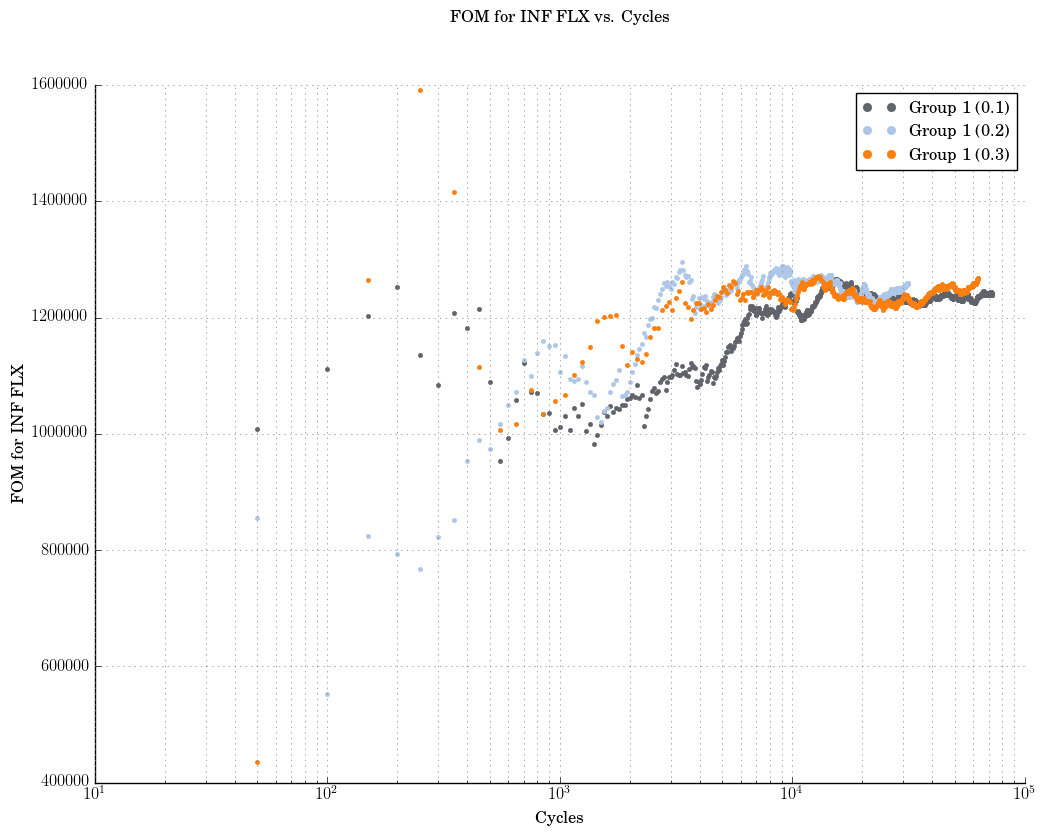

In [13]:
pwr_comp.plot('INF_FLX',grp_entry=1, avg_n=10)